**Description**
- This notebook, I built a model to predict whether a given competitive math problem is either a algebra or a number theory topic. 
- 2 models are being implemented. A LSTM and a simple neural network.
- Each training data contains problem sentences, category, difficulty, and solutions. 
- The dataset contains 7 different categories of math problem and I extracted 2 of those. 
- we will use math problem sentences as our x input and the category as our y output label.


**Problem motivation** :

Many students found difficulty in studying mathematics. Most of the time, the difficulty happends because they do not know where or what to review when facing a math assignment. Thus, by tagging the topic on a math question they're facing to solve, it will improve the process of reviewing their materials. 


**Single train data**: 

{
    "problem": "What is the coefficient of $x^8$ in the expansion of $(x-1)^9$?",
    "level": "Level 3",
    "type": "Counting & Probability",
    "solution": "By the Binomial Theorem applied to $(x+(-1))^9$, this term is $\\binom98x^8(-1)^1=-9x^8$.  The coefficient of this term is $\\boxed{-9}$."
}

# 1 Data organization

## 1.0 Dealing with messy json files 

First we check how many training examples we have for each category 

In [49]:
# define number of math category 
category = ["algebra","counting_and_probability","geometry","intermediate_algebra","number_theory","prealgebra","precalculus"]
category_data_size = [1743,770,869,1294,868,1204,745]
num_category = len(category)

Since the json data I found was isolated, I combine multiple json file into single json file.

In [50]:
# # # 2pm - 3.30 pm 
# import json
# main_path = r"C:\Users\koukiDevice\Desktop\Math problem tag\train\precalculus\prcl"
# load_num = 745  # how many files to load
# entire_list = []
# for i in range(load_num): # iterate all the json files 
#     path  = (str(main_path) +  "(" + str(i) + ")" + ".json") # generate file names 
#     file = open(path) # open file 
#     data = json.load(file) # load single file
#     entire_list.append(data) # put single json file into a list
# # print(entire_list) # what whole json for single category look like 
# json_obj = json.dumps(entire_list)

# wit## 1.0 Dealing with messy json files h open("precalculus.json", "w") as outfile:
#     outfile.write(json_obj)

## 1.1 Organize dataset into pandas dataframe 

In [51]:
import pandas as pd## 1.0 Dealing with messy json files 
import numpy as np

We take a look of single sentence problem from algebra category.

In [52]:
df=pd.read_json('train.json') # (868, 1) x 2 
df['all']['algebra'][0]['problem']

'If $A=2+i$, $O=-4$, $P=-i$, and $S=2+4i$, find $A-O+P+S$.'

We combine two categories from algebra and number theory into a single list  

In [53]:
sent_1 = []
sent_2 = []
for i in range(868):
    sent_1.append(df['all']['algebra'][i]['problem'])
    sent_2.append(df['all']['number_theory'][i]['problem'])
sent = sent_1 + sent_2
len(sent)

1736

Since the current order of x problem sentence contains label meaning,<br> we can create an scalar vector that contains zeros and ones with the length of our training set.

In [54]:
y = np.concatenate((np.zeros(868),np.ones(868))) 
len(y)

1736

Here, we organize our data by putting x input and y label into single pandas dataframe and rename some columns<br> **Note**
 : when dealing with non-csv files, try to convert them to pandas to reduce complexity. <br>(ex: I spent more than 3 hours writing a code to organize dataset without pandas format, please avoid next time)

In [55]:
df = pd.DataFrame(sent)  
df

,0
0,"If $A=2+i$, $O=-4$, $P=-i$, and $S=2+4i$, find..."
1,The perimeter of a rectangle is 24 inches. Wha...
2,What is the sum of all values of $y$ for which...
3,"If $3p+4q=8$ and $4p+3q=13$, what is $q$ equal..."
4,"After traveling 50 miles by taxi, Ann is charg..."
...,...
1731,Compute the remainder when\n${2007 \choose 0} ...
1732,Find the remainder when $3^{3^{3^3}}$ is divid...
1733,What is the largest four-digit negative intege...
1734,What is the smallest prime divisor of $5^{23} ...


In [56]:
df.insert(1,"category",y)

In [57]:
df.rename(columns ={0:'problem sentence'})

,problem sentence,category
0,"If $A=2+i$, $O=-4$, $P=-i$, and $S=2+4i$, find...",0.0
1,The perimeter of a rectangle is 24 inches. Wha...,0.0
2,What is the sum of all values of $y$ for which...,0.0
3,"If $3p+4q=8$ and $4p+3q=13$, what is $q$ equal...",0.0
4,"After traveling 50 miles by taxi, Ann is charg...",0.0
...,...,...
1731,Compute the remainder when\n${2007 \choose 0} ...,1.0
1732,Find the remainder when $3^{3^{3^3}}$ is divid...,1.0
1733,What is the largest four-digit negative intege...,1.0
1734,What is the smallest prime divisor of $5^{23} ...,1.0


In [58]:
x = df.iloc[:, 0]
y = df['category']

# 2.0 Word Cloud


## Observation on word clouds 
Here, we build a word cloud to find the feature difference (formula, text, order of sentence) between algebra & number theory problem sentence <br> 
<br> Algebra 
- Algebra have more terms like y,x,b 
- Solution ten to be discrete value such they ask Find value x<br>
- graph are used more 

<br>Counting/Probability
- binary numbers appears 
- small/large and max/min are used 
- factorize/divide categories 

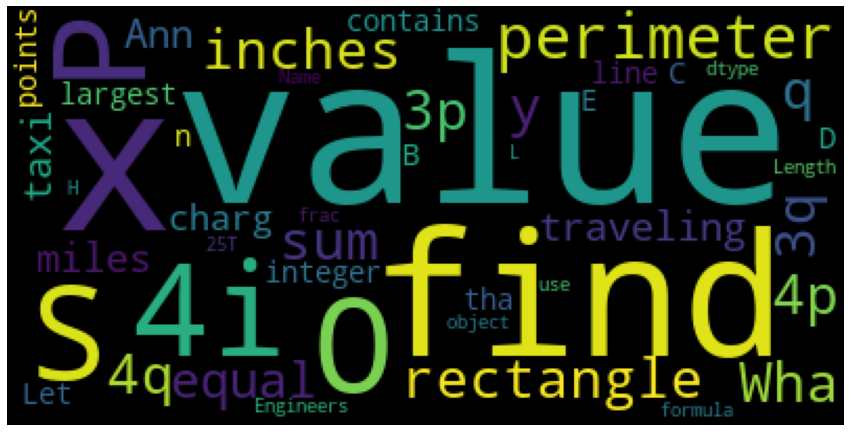

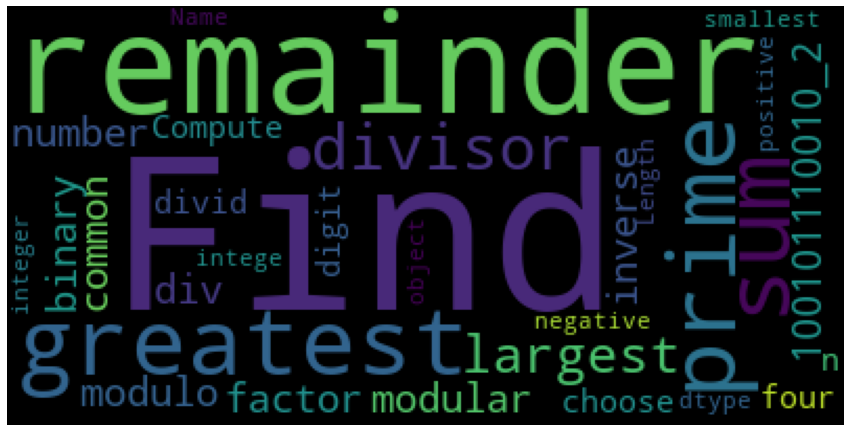

In [59]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
algebra = str(x[:868])
number_theory = str(x[868:])

wordcloud1 = WordCloud(stopwords=STOPWORDS,background_color='black',max_words =300).generate(algebra) # sentence cleaned, generate word cloud 
wordcloud2 = WordCloud(stopwords=STOPWORDS,background_color='black',max_words =300).generate(number_theory) # sentence cleaned, generate word cloud 

plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

# 3.0 Preprocessing 

For this section, our main goal is to convert every single math problem sentences into one hot representation so that Embedding layer can properly compute. <br> <br>Self Note : I've coded preprocess functions for sentences from scratch such as building word dictionary, removing stop words. Use API and avoid building from scratch, because it adds complexity and produce "tons" of errors. 

In [60]:
sentence = x.copy()

Here we look at what we need to convert 

In [61]:
sentence[0]

'If $A=2+i$, $O=-4$, $P=-i$, and $S=2+4i$, find $A-O+P+S$.'

In [62]:
import nltk
import re
from nltk.corpus import stopwords

In [63]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\koukiDevice\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 3.1 sentence cleaning 

- For every training example sentences, we remove non-alpha numeric character, lower case phrase, split phrase to phrase, delete stopwords (ex:the,a,with).
- Then, we throw each sentence into a list.
- Note that, there exist a large difference between before and after process for each sentences. 

In [64]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer ##stemming purpose
ps = PorterStemmer()
corpus = []
for i in range(0, len(sentence)):
    review = re.sub('[^a-zA-Z]', ' ', sentence[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [65]:
corpus

['p find p',
 'perimet rectangl inch number squar inch maximum possibl area rectangl',
 'sum valu express frac undefin',
 'p q p q q equal',
 'travel mile taxi ann charg fare assum taxi fare directli proport distanc travel much would ann charg dollar travel mile',
 'let f x left begin array cl ax text x x text le x le x b text x end array right find b piecewis function continu mean graph drawn without lift pencil paper',
 'valu b rang function f x x bx express answer interv notat',
 'let p q two distinct solut equat frac x x x x p q valu p q',
 'mani posit whole number cube root less exampl would count sinc sqrt',
 'mani integ n satisfi inequ pi le n le pi',
 'decim point certain posit decim number move four place right new number four time reciproc origin number origin number',
 'evalu b b b b',
 'expand z z z z',
 'mani nonzero term expans x x x x x x',
 'joann rode bike averag speed mile per hour three half hour friend fran ride hour averag speed mile per hour would ride bike travel

In [66]:
corpus[1]

'perimet rectangl inch number squar inch maximum possibl area rectangl'

## 3.2 One hot encoding sentences

In [67]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

- Here, we turn each sentence's phrase into dictionary index. <br> ex: ["I love language model model"] -> ["I","love","language","model","model"] -> [1,2,3,4,4]
<br>
<br>
- Library (one_hot) will auto created a word dictionary, which maps each input phrase to a single new index.

Here is a look of our last train example sentence being converted

In [68]:
from tensorflow.keras.preprocessing.text import one_hot
voc_size = 5000
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr[1735]

[4714, 3087, 361, 4256, 1456, 2556, 2214]

In [69]:
corpus[1]

'perimet rectangl inch number squar inch maximum possibl area rectangl'

In [70]:
onehot_repr[1]

[3440, 3599, 2501, 1381, 2631, 2501, 709, 149, 583, 3599]

## 3.3 Padding 
- Note that, each trainig example has different length, this will create complexity for our input layers.
- Thus, we want each sentence representation to have the same length.<br>
- Self Note : 1. you have pre/post options 2. in CNN for computer vision, it has the same idea (You pad each image channel on the outer layer)

In [71]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[1752 3680 1752 ...    0    0    0]
 [3440 3599 2501 ...    0    0    0]
 [2822 2574 2990 ...    0    0    0]
 ...
 [4714  959 1456 ...    0    0    0]
 [1372 4158 3553 ...    0    0    0]
 [4714 3087  361 ...    0    0    0]]


In [72]:
embedded_docs[1]

array([3440, 3599, 2501, 1381, 2631, 2501,  709,  149,  583, 3599,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

Note : tf.keras means integrated version of tf and keras 

# 4.0 Model architecture

In [73]:
import tensorflow as tf 
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

## Overview of architecture 
Self note : 
### 4.1 Embedding layer 
- Previously, we have each sentences represented in a indexes format. At this point we want to convert each single word (index) into a fixed length vector. <br>[2,56,67] -> pick "2 -> "2 becomes [2,5,64,12]"
- The fixed length of vector was the key to allow word vector to represent in a reduced dimension, which avoids complexity. 
- It is a matrix with the column represent word dictionary, while row represent feature words (words you want to correlate with given input words). This matrix allow computing to hold context similarities between word. 
- A bit similar to cosine similarity (To find context similarity between 2 words, one computes the angle between 2 vectors. The smaller the angle, the closer context of 2 words.)
- You can also use pretrained Word2Vec,Glove.

In [74]:
embedding_vector_features=40 ##features representation
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))


### 4.2 LSTM 
<br> The overview computation 
- Now, we will take each embedded word vector that we output from embedding layer.
- Next, we create a LSTM with 100 LSTM cells (hidden units) connected to each other from left to right.
- We parse in one sentence (ex : "My name is Koki") as an x input of a single LSTM cell. LSTM will break each sentence into one word to parse at t time stamp. 
- Forget Gate : After a sentence is parse into this layer, x word will get computed with weight and biases, followed by sigmoid. This layer will decide what words to forget by doing a pointwise operation. 
- Input gate : First, as sentence x getting parsed, z=w*x+b will be calculated,  flow into sigmoid and tanh. It then decides what words to remember. 
- Output gate: Fianlly information flowed from output from input gate's pointwise and X input will be computed together. Then that value will pass into the next LSTM cell. 


<br> Add-ons 
- Computation forgets a word based on the changes in context of the a sentence x. 
<br><br> ex: Suppose you have 2 math problem, "find gcd value" and "find maximum value". If you parse the first sentence, the unique noun "gcd" will be extracted and remembered. When the second sentence parsed, it will extract the noun "maximum". The computation will somehow forget a little about the first noun, then remembers the second. (Need to be refined)
<br>

- Pointwise Computation to forget/remember word : Suppose we have a filter vector of [1,1,0] and input  vector of [2,4,5]. Value "0" implies word to forget, while "1" implies word to remember. And, 2,4,5 each number represents a single word. We multiply these 2 vectors to decide what to forget. 
<br>
- LSTM only takes in a 3D tensor. First dimension is based on the word vector.

In [75]:
model.add(LSTM(100))

## 4.3 Sigmoid
- Finally, we take the output from the last LSTM layer, which contains information about the relevancy of either Number theory or Algebra problem. 
- We convert that output to a probability value between 0-1. This value implies whether the sentence problem was algebra or number theory.

In [76]:
model.add(Dense(1,activation='sigmoid'))

## 4.4 Loss,optimization,accuracy

- Since this is a binary classification task, we will use binary_crossentropy to calculate our loss (y predicted- y actual). 
- Also, we use adam optimizer to update our weights/biases inside our LSTM layer.

In [77]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [78]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000001E78FECB580>>

We double check our input and output label are in the correcct shape before training.

In [79]:
len(embedded_docs),y.shape

(1736, (1736,))

In [80]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [81]:
X_final.shape,y_final.shape

((1736, 20), (1736,))

## 5 Split/Train 

Since our data size is not mass, we will the 7:3 ratio method instead of 9:0.5:0.5. to split our train/test data.

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

Now we wait and train our model.

In [83]:
### Finally Training
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
19/19 [==============================] - 3s 46ms/step - loss: 0.6920 - accuracy: 0.5202 - val_loss: 0.6744 - val_accuracy: 0.5899
Epoch 2/10
19/19 [==============================] - 0s 15ms/step - loss: 0.4747 - accuracy: 0.8418 - val_loss: 0.3938 - val_accuracy: 0.8464
Epoch 3/10
19/19 [==============================] - 0s 14ms/step - loss: 0.2327 - accuracy: 0.9183 - val_loss: 0.2920 - val_accuracy: 0.8866
Epoch 4/10
19/19 [==============================] - 0s 14ms/step - loss: 0.1521 - accuracy: 0.9475 - val_loss: 0.2673 - val_accuracy: 0.8901
Epoch 5/10
19/19 [==============================] - 0s 15ms/step - loss: 0.1197 - accuracy: 0.9690 - val_loss: 0.3671 - val_accuracy: 0.8866
Epoch 6/10
19/19 [==============================] - 0s 16ms/step - loss: 0.0952 - accuracy: 0.9751 - val_loss: 0.3116 - val_accuracy: 0.8918
Epoch 7/10
19/19 [==============================] - 0s 14ms/step - loss: 0.0788 - accuracy: 0.9802 - val_loss: 0.3961 - val_accuracy: 0.8918
Epoch 8/10
19

In [84]:
y_pred = model.predict(X_test)

18/18 [==============================] - 0s 4ms/step


In [85]:
len(X_test)

573

In [86]:
X_test[0]

array([2364, 2129, 1042,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

In [87]:
y_pred = np.where(y_pred > 0.6, 1,0) ##AUC ROC Curve

In [88]:
y_pred

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [89]:
score = model.evaluate(X_test, y_test, verbose=1)

18/18 [==============================] - 0s 4ms/step - loss: 0.3785 - accuracy: 0.8883


## 6. Model analysis

In [90]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.37847989797592163
Test Accuracy: 0.8883071541786194


- As the graph shown, model accuracy for train/test is quite reliable. However, loss is not performing to well for test set. This implies that model have potential to fail predicting new problem sentences. This is considered to be a overfitting problem. 
- For future directions, more data can be gathered, apply regularization method, or data augmentation. 

Notes : 
<br>Overfitting: Good performance on the training data, poor generliazation to other data. <br>Underfitting: Poor performance on the training data and poor generalization to other data

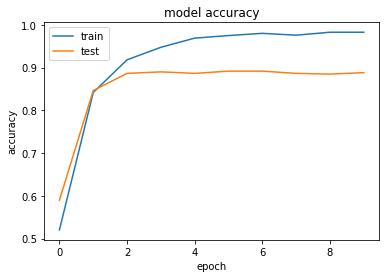

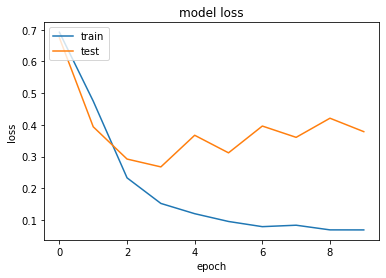

In [91]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) 
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## 7. Test new problem sentence

- Here I have 2 new problem sentences from algebra and number theory, which I removed from the training data at the beginning.
- 2 sentences are converted into word index representation and being padded.

In [92]:
sample_alg = [2439, 4400, 2081, 3332, 89, 2081, 340, 3611, 3628, 4400]
sample_nbt = [1322, 2256, 331, 4998, 76, 4329, 1320]

sample_alg = np.array([sample_alg])
sample_nbt = np.array([sample_nbt])

sample_alg = pad_sequences(sample_alg,padding='post',maxlen=sent_length)
sample_nbt = pad_sequences(sample_nbt,padding='post',maxlen=sent_length)

In [93]:
sample_alg,sample_nbt

(array([[2439, 4400, 2081, 3332,   89, 2081,  340, 3611, 3628, 4400,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0]]),
 array([[1322, 2256,  331, 4998,   76, 4329, 1320,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0]]))

- Here we use our trained LSTM model predict those 2 new sentences. 
- As shown below, algebra produced a value which is closer to 0 and number theory problem gets closed to 1. 

In [94]:
print(model.predict(sample_alg)) 
print(model.predict(sample_nbt)) 

1/1 [==============================] - 0s 14ms/step
[[0.13922253]]
1/1 [==============================] - 0s 14ms/step
[[0.9636523]]


## 7.0 Failures 

This sections contains code/function that didn't worked well or decided not to use. Some due to its complexity.

## 7.0  A simple neural network model

In [95]:
# Simple Neural Network 
from keras.layers import Flatten
 
model2=Sequential()
model2.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model2.summary())

# model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
# model.add(LSTM(100))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 801       
                                                                 
Total params: 200,801
Trainable params: 200,801
Non-trainable params: 0
_________________________________________________________________
None


In [96]:
history_2 = model2.fit(X_train, y_train, batch_size=128, epochs=150, verbose=1, validation_split=0.2)

Epoch 1/150
8/8 [==============================] - 1s 21ms/step - loss: 0.6911 - accuracy: 0.5366 - val_loss: 0.6849 - val_accuracy: 0.6695
Epoch 2/150
8/8 [==============================] - 0s 5ms/step - loss: 0.6728 - accuracy: 0.8215 - val_loss: 0.6741 - val_accuracy: 0.7425
Epoch 3/150
8/8 [==============================] - 0s 5ms/step - loss: 0.6541 - accuracy: 0.8839 - val_loss: 0.6610 - val_accuracy: 0.7983
Epoch 4/150
8/8 [==============================] - 0s 5ms/step - loss: 0.6310 - accuracy: 0.9097 - val_loss: 0.6402 - val_accuracy: 0.8627
Epoch 5/150
8/8 [==============================] - 0s 5ms/step - loss: 0.6027 - accuracy: 0.9269 - val_loss: 0.6131 - val_accuracy: 0.8755
Epoch 6/150
8/8 [==============================] - 0s 5ms/step - loss: 0.5682 - accuracy: 0.9097 - val_loss: 0.5813 - val_accuracy: 0.8755
Epoch 7/150
8/8 [==============================] - 0s 5ms/step - loss: 0.5287 - accuracy: 0.9280 - val_loss: 0.5465 - val_accuracy: 0.8927
Epoch 8/150
8/8 [=========

In [97]:
score = model2.evaluate(X_test, y_test, verbose=1)

18/18 [==============================] - 0s 806us/step - loss: 0.3027 - accuracy: 0.8935


In [98]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.30266645550727844
Test Accuracy: 0.8935427665710449


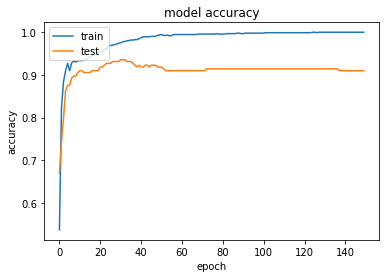

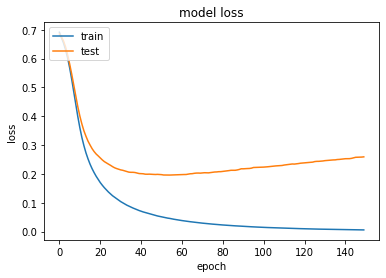

In [99]:

plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [100]:
print(model2.predict(sample_alg)) 
print(model2.predict(sample_nbt)) 

1/1 [==============================] - 0s 25ms/step
[[0.10498627]]
1/1 [==============================] - 0s 25ms/step
[[0.4508876]]


## 7.1 Pre-process tools 

I recode the pre-process function. And, some I decided to use API.

In [ ]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
stop = stopwords.words('stopwords ')

import re 
# function to clean sentence
def clean_sentences(sentence):
    
    length = len(sentence)
    bag_list = []
    
    for i in range(length):
        sentence = sentence.replace(r'[^a-zA-Z0-9]', '')
        sentence =  " ".join([word for word in sentence if word not in (stop)]) # remove stop words  
        bag_list = sentence.lower().split() # lower case, split words, throw in a list 
        
        sentence = word_tokenize(sentence)
        
    length = len(bag_list)
    
    for j in range(length):
        stemmer = PorterStemmer() # create stemming object from nltk 
        bag_list[j] = stemmer.stem(bag_list[j])
        
    return bag_list

A function to store word dictionary from given input sentences.

In [ ]:
# Build the vocabulary
# Unit Test Note - There is no test set here only train/val
def get_vocab(sentence,num_train_x):

    # Include special tokens 
    # started with pad, end of line and unk tokens
    Vocab = {'__PAD__': 0, '__</e>__': 1, '__UNK__': 2} 
     
    # Note that we build vocab using training data
    m = num_train_x
    for i in range(m): # iterate every examples 
        # print(sentence[i]) # get single sentence 
        length = len(sentence[i]) # number of phrase for single example 
          
        for word_index in range(length):
            # print(sentence[i][word_index]) # get single word from ith sentence 
            if sentence[i][word_index] not in Vocab:
                Vocab[sentence[i][word_index]] = len(Vocab)

            # print(sentence[i][j],"\n") # iterate every single word in a sentence
            # print(sentence[0][0]) # single sentence / word in single sentence 
    
    return Vocab

## 8. Some soft lessons

Lessons: 
- Test small scale value on function, and record what it does is crucial. Also mentioned in Andrej Karpathy's Blog
- Deep learning is more about understanding what each small neurons are compute mathematically than purely coding. Thus, focus understand "why" naturally is crucial than "how". Computation sense is important (ex: [1,1,0], forget gates will remember 1 and forgets 0)